In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import time

from GA_params_test import GeneticAlgorithm

cnn_model_path = '../../Models/CNN_6_1_2.keras'
masked_sequence = 'AATACTAGAGGTCTTCCGACNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNGTGTGGGCGGGAAGACAACTAGGGG'
target_expression = 0
precision = 0.001
lineages = 1
verbose = 1

In [14]:
def test_combination(**kwargs):
    run_times = []
    errors = []
    
    ga = GeneticAlgorithm(
        cnn_model_path=cnn_model_path,
        masked_sequence=masked_sequence,
        target_expression=target_expression,
        precision=precision,
        verbose=verbose,
        seed=0,
        **kwargs
    )
    # Time the run
    start_time = time.time()
    best_sequences, best_predictions = ga.run(lineages)
    end_time = time.time()

    # Record the results
    errors.extend(abs(prediction - target_expression) for prediction in best_predictions)
    run_times.append((end_time - start_time) / lineages)

    return errors, run_times 

def test_range(**kwargs):
    errors = []
    run_times = []
    
    # Loop through provided ranges
    for key, values in kwargs.items():
        for value in values:
            param = {key: value}  # Create dynamic kwargs
            error, run_time = test_combination(**param)  # Unpack dynamic kwargs
            errors.append(error)
            run_times.append(run_times)

    return errors, run_times

def scatter_plot_plr(x, y, title, x_label, y_label, degrees):

    x = np.array(x, dtype=float)
    y = np.array(y, dtype=float)

    plt.scatter(x, y)
    
    # Polynomial regression
    coeffs = np.polyfit(x, y, degrees)
    poly_eqn = np.poly1d(coeffs)
    
    # Generate x values for the regression line
    x_fit = np.linspace(min(x), max(x), 500)
    y_fit = poly_eqn(x_fit)
    
    # Plot polynomial regression line
    plt.plot(x_fit, y_fit, color='red', label=f"Polynomial Fit (degree {degrees})")
    
    # Adding titles and labels
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.legend()
    plt.show()

In [7]:
# Define ranges
range_pop_size = np.linspace(10, 50, 20, dtype=int)
errors, run_times = test_range(pop_size=range_pop_size)

Lineage 1 Complete: Best TX rate: 0.1537 | Best Sequence: TCTTTGAATTGGACGCGCCTTTCGTTCTCC
Lineage 1 Complete: Best TX rate: 0.1460 | Best Sequence: GCTTTGTCTTGGCTGCCGTGCTACAGTGCA
Lineage 1 Complete: Best TX rate: 0.1458 | Best Sequence: CTCATGTGGCCAATCCCGCCCTTGTTGCCC
Lineage 1 Complete: Best TX rate: 0.1296 | Best Sequence: GCCAATTCGTCATTGCCTTTCGGCGCTGAG
Lineage 1 Complete: Best TX rate: 0.1381 | Best Sequence: CTAATCTTGCCAAAGCCCCTTTTGTTGTCG
Lineage 1 Complete: Best TX rate: 0.1407 | Best Sequence: CATTTGCATTGCCCCCGCGTTGTGTCGGCG
Lineage 1 Complete: Best TX rate: 0.1585 | Best Sequence: CATGCGTAACCCGTCCCCCTTTCGTTGACG
Lineage 1 Complete: Best TX rate: 0.1234 | Best Sequence: CCCTAATGGCCATTCCCCCTATTGTTGACG
Lineage 1 Complete: Best TX rate: 0.1429 | Best Sequence: CTTATGTGACCACTTGCCCTTGTTGGCGTT
Lineage 1 Complete: Best TX rate: 0.1596 | Best Sequence: TCCTTTGGAACTGACCGCCTTGGCTGTTTC
Lineage 1 Complete: Best TX rate: 0.1616 | Best Sequence: GCCAATTTGTCGGAGCCTTCCAGCGATGCC
Lineage 1 Complete: B

ValueError: Polynomial must be 1d only.

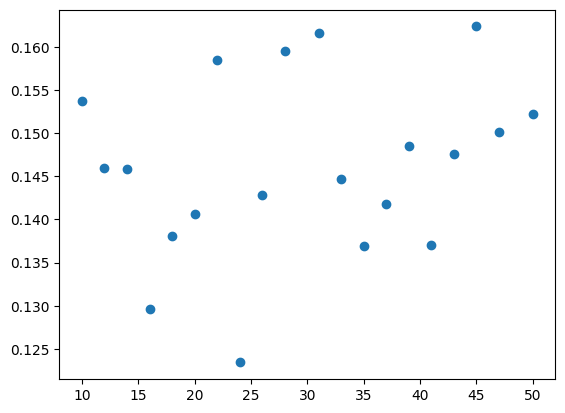

In [15]:
scatter_plot_plr(range_pop_size, errors, 'Population Size vs. Error', 'Population Size', 'Error', 2)

In [16]:
range_pop_size, errors

(array([10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 31, 33, 35, 37, 39, 41, 43,
        45, 47, 50]),
 [[0.15372155606746674],
  [0.1459701657295227],
  [0.14582782983779907],
  [0.12958908081054688],
  [0.1381097137928009],
  [0.1406811624765396],
  [0.15853801369667053],
  [0.12341152131557465],
  [0.14286790788173676],
  [0.15956801176071167],
  [0.16163262724876404],
  [0.14475268125534058],
  [0.13692070543766022],
  [0.14179560542106628],
  [0.14854496717453003],
  [0.13708576560020447],
  [0.14763377606868744],
  [0.16239464282989502],
  [0.15020090341567993],
  [0.15229462087154388]])